In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from urllib import urlretrieve
import cPickle as pickle
import os
import gzip

import numpy as np
import theano

import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
import time

In [10]:
data = pd.read_csv('data/fer2013.csv')

In [11]:
training_image = []
training_label_full = []
test_image = []
test_label_full = []

start_time = time.time()
for index, row in data.iterrows():
    if row['Usage'] == 'Training':
        training_image.append(np.reshape(np.array(row['pixels'].split(), dtype=np.uint8), (48, 48)))
        training_label_full.append(row['emotion'])
    else:
        test_image.append(np.reshape(np.array(row['pixels'].split(), dtype=np.uint8), (48, 48)))
        test_label_full.append(row['emotion'])
        
print('reading done in %f sec' % (time.time() - start_time))

reading done in 45.850110 sec


In [18]:
X_train = np.array(training_image).reshape((-1, 1, 48, 48))
X_test = np.array(test_image).reshape((-1, 1, 48, 48))

y_train = np.array(training_label_full, dtype=np.uint8)
y_test = np.array(test_label_full, dtype=np.uint8)

In [26]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 48, 48),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=7,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.001,
    update_momentum=0.9,
    max_epochs=10,
    verbose=1,
    )

# Train the network
start_time = time.time()
nn = net1.fit(X_train, y_train)
print('nn fit done in %f sec' % (time.time() - start_time))

INFO (theano.gof.compilelock): Refreshing lock /Users/vinayakvivek/.theano/compiledir_Darwin-16.1.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock


# Neural Network with 692071 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x48x48
  1  conv2d1   32x44x44
  2  maxpool1  32x22x22
  3  conv2d2   32x18x18
  4  maxpool2  32x9x9
  5  dropout1  32x9x9
  6  dense     256
  7  dropout2  256
  8  output    7

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -------
      1     2.87870     1.83391    1.56971      0.25139  143.24s
      2     1.83347     1.81657    1.00930      0.25035  136.11s
      3     1.82627     1.81321    1.00720      0.25104  166.93s
nn fit done in 488.192303 sec


In [20]:
start_time = time.time()
preds = net1.predict(X_test)
print('prediction done in %f sec' % (time.time() - start_time))

prediction done in 14.467163 sec


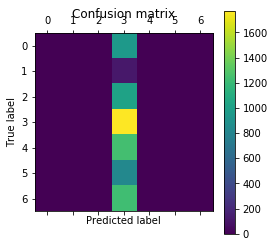

0.247144051268


In [22]:
cm = confusion_matrix(y_test, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(np.mean(y_test == preds))

In [2]:
def load_dataset():
    url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    filename = 'mnist.pkl.gz'
    if not os.path.exists(filename):
        print("Downloading MNIST dataset...")
        urlretrieve(url, filename)

    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)
        
    print(len(data))

    X_train, y_train = data[0]
    X_val, y_val = data[1]
    X_test, y_test = data[2]
    
    print(X_train.shape, y_train.shape)

    X_train = X_train.reshape((-1, 1, 28, 28))
    X_val = X_val.reshape((-1, 1, 28, 28))
    X_test = X_test.reshape((-1, 1, 28, 28))
    
    print(X_train.shape, y_train.shape)

    y_train = y_train.astype(np.uint8)
    y_val = y_val.astype(np.uint8)
    y_test = y_test.astype(np.uint8)

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
plt.imshow(X_train[0][0], cmap=cm.binary)



3
((50000, 784), (50000,))
((50000, 1, 28, 28), (50000,))


In [4]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=10,
    verbose=1,
    )

# Train the network
start_time = time.time()
nn = net1.fit(X_train, y_train)

print('nn fit done in %f sec' % (time.time() - start_time))

INFO (theano.gof.compilelock): Refreshing lock /Users/vinayakvivek/.theano/compiledir_Darwin-16.1.0-x86_64-i386-64bit-i386-2.7.13-64/lock_dir/lock


# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   32x24x24
  2  maxpool1  32x12x12
  3  conv2d2   32x8x8
  4  maxpool2  32x4x4
  5  dropout1  32x4x4
  6  dense     256
  7  dropout2  256
  8  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.77610     0.14880    5.21567      0.95682  62.77s
      2     0.25369     0.10102    2.51117      0.97011  59.74s
      3     0.18693     0.08196    2.28072      0.97611  62.10s
      4     0.15143     0.06982    2.16882      0.97961  60.68s
      5     0.12933     0.06132    2.10920      0.98141  62.01s
      6     0.11582     0.05595    2.07027      0.98431  62.36s
      7     0.10763     0.05145    2.09195      0.98461  59.78s
      8     0.09658     0.04943    1.95375      0.98521  59.33s
      9     0.09106     0.04682    1.94504      0.98

In [5]:
start_time = time.time()
preds = net1.predict(X_test)
print('prediction done in %f sec' % (time.time() - start_time))

prediction done in 4.531349 sec


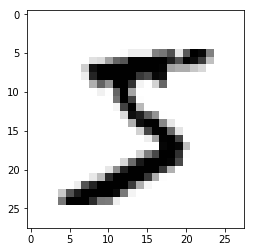

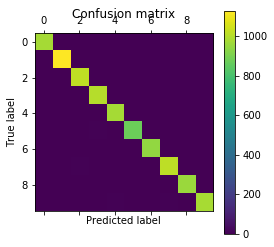

In [6]:
cm = confusion_matrix(y_test, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()